In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

df = pd.read_csv('/content/creditcard_2023.csv')

# Drop any rows with missing values in 'Class'
df.dropna(subset=['Class'], inplace=True)

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine into a DataFrame again
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Print class distribution
class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)

# Save to CSV if needed
resampled_df.to_csv('/content/balanced_dataset_rus.csv', index=False)


New Class Distribution:
Class
0.0    33121
1.0    33121
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317436 entries, 0 to 317435
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      317436 non-null  int64  
 1   V1      317436 non-null  float64
 2   V2      317436 non-null  float64
 3   V3      317436 non-null  float64
 4   V4      317436 non-null  float64
 5   V5      317436 non-null  float64
 6   V6      317436 non-null  float64
 7   V7      317436 non-null  float64
 8   V8      317436 non-null  float64
 9   V9      317436 non-null  float64
 10  V10     317436 non-null  float64
 11  V11     317436 non-null  float64
 12  V12     317436 non-null  float64
 13  V13     317436 non-null  float64
 14  V14     317436 non-null  float64
 15  V15     317436 non-null  float64
 16  V16     317436 non-null  float64
 17  V17     317436 non-null  float64
 18  V18     317436 non-null  float64
 19  V19     317436 non-null  float64
 20  V20     317436 non-null  float64
 21  V21     317436 

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,...,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000,317436.000000
mean,158717.500000,0.399887,-0.388595,0.539135,-0.582085,0.267609,0.343698,0.388054,-0.114006,0.462948,...,-0.086885,-0.010934,-0.007793,0.103868,-0.048869,-0.057040,-0.169424,-0.080749,12031.323672,0.104339
std,91636.024363,0.888275,0.798724,0.823432,0.809298,0.758058,0.811025,0.784977,0.508493,0.834523,...,0.528289,0.750191,0.720674,1.104807,0.876554,1.066738,0.649925,0.841337,6927.146538,0.305700
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.120000,0.000000
25%,79358.750000,-0.196748,-0.632662,0.034916,-1.028581,-0.029898,-0.046982,0.215878,-0.197955,0.044852,...,-0.192243,-0.516151,-0.195230,-0.612348,-0.583301,-0.753076,-0.315871,-0.228645,6039.155000,0.000000
50%,158717.500000,0.123643,-0.388011,0.473367,-0.554252,0.210159,0.277688,0.423239,-0.142542,0.411903,...,-0.104697,-0.034710,-0.039251,0.099943,-0.045983,-0.087676,-0.227670,-0.065006,12005.185000,0.000000
75%,238076.250000,1.042078,-0.129070,1.029975,-0.176390,0.506074,0.661110,0.630158,-0.059581,0.834604,...,-0.009382,0.461304,0.131911,0.887536,0.508305,0.565541,-0.087275,0.129812,18040.877500,0.000000
max,317435.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,...,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000


In [ ]:
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
Categorical_Features = df.select_dtypes(include=['object']).columns

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Check new class distribution
class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)


New Class Distribution:
Class
0.0    33121
1.0    33121
Name: count, dtype: int64


In [ ]:
print("Missing values", resampled_df.isnull().sum())



Missing values id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


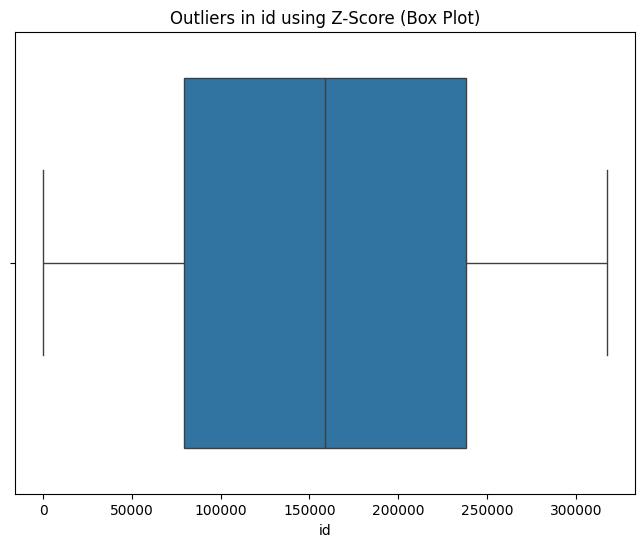

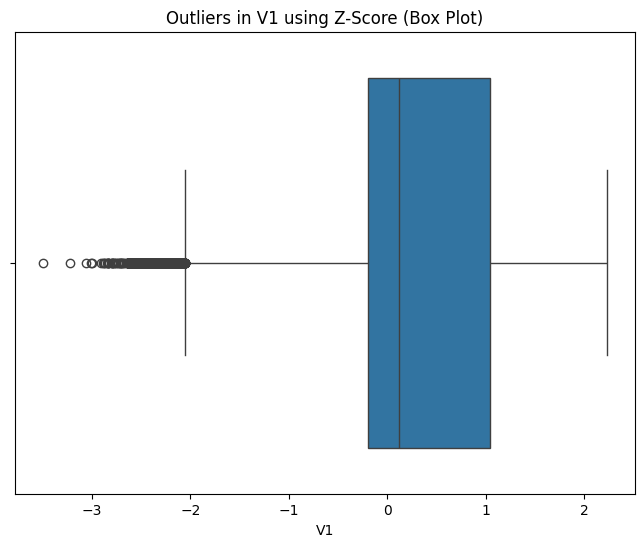

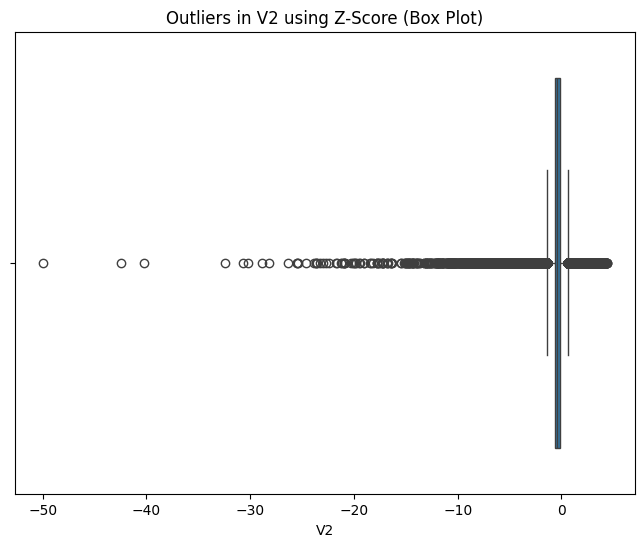

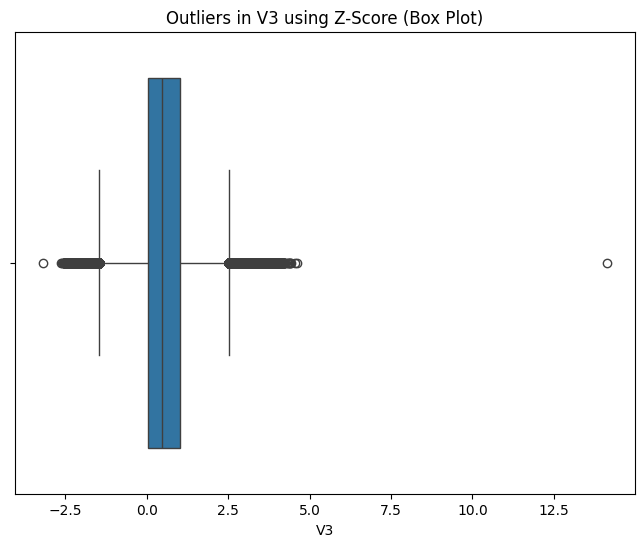

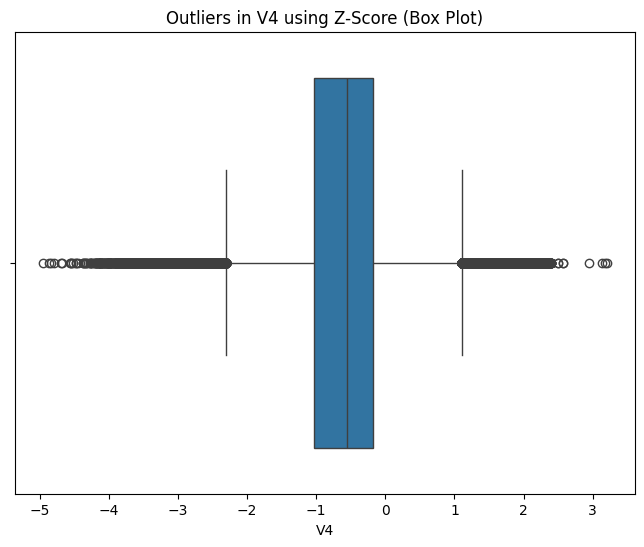

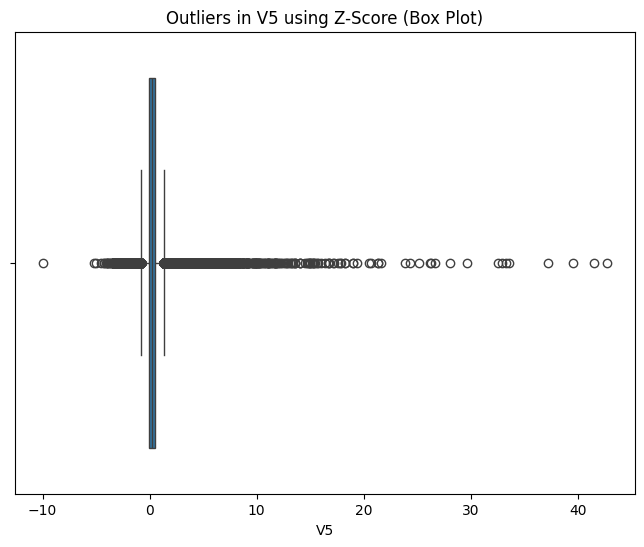

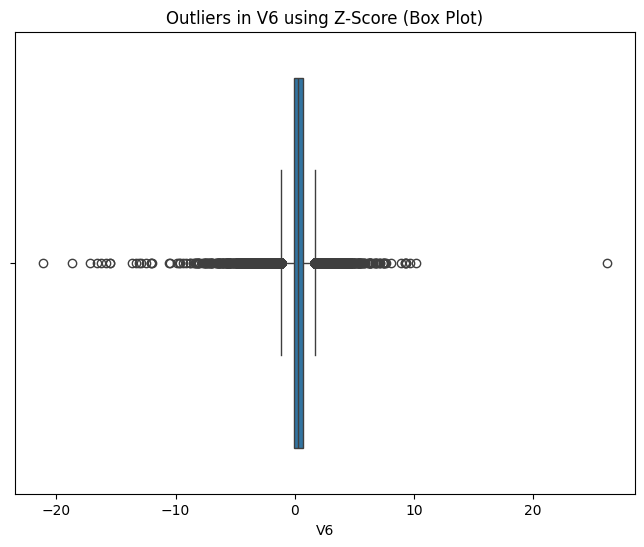

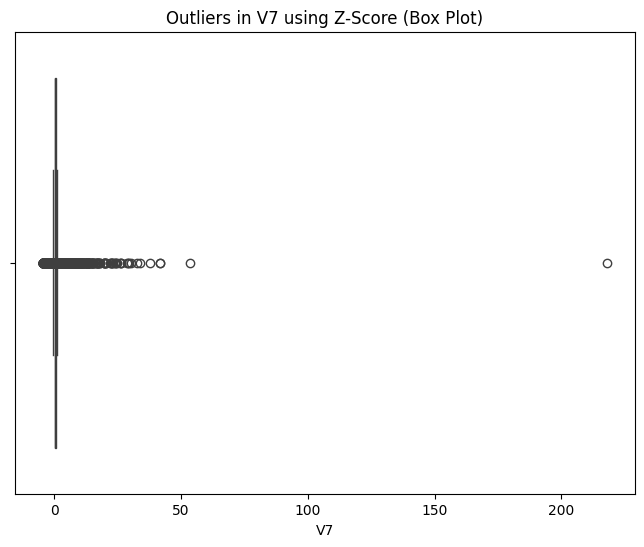

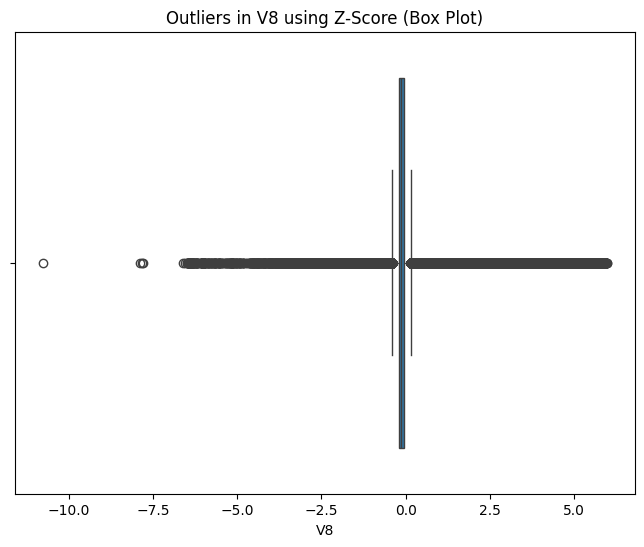

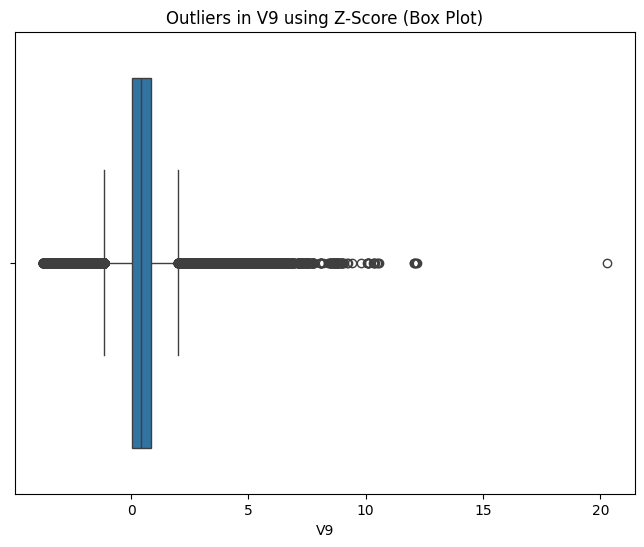

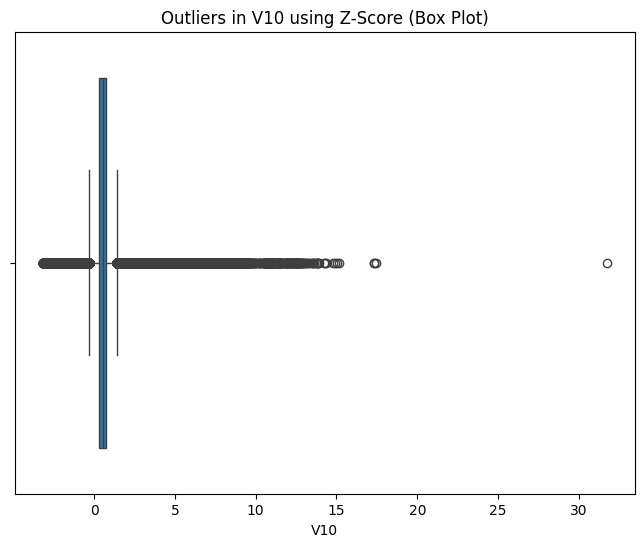

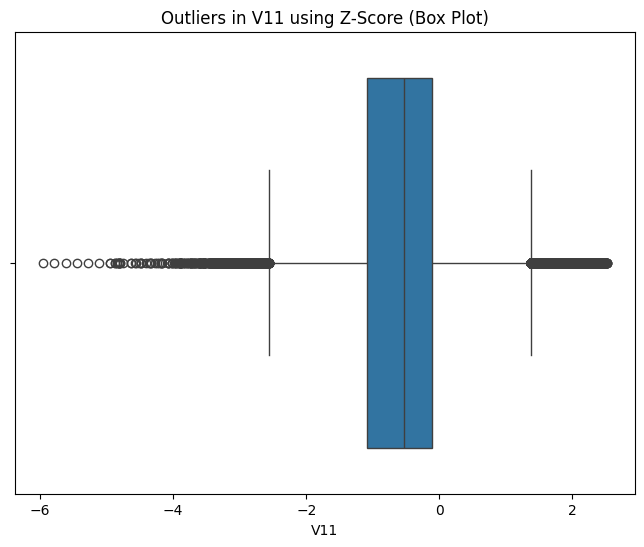

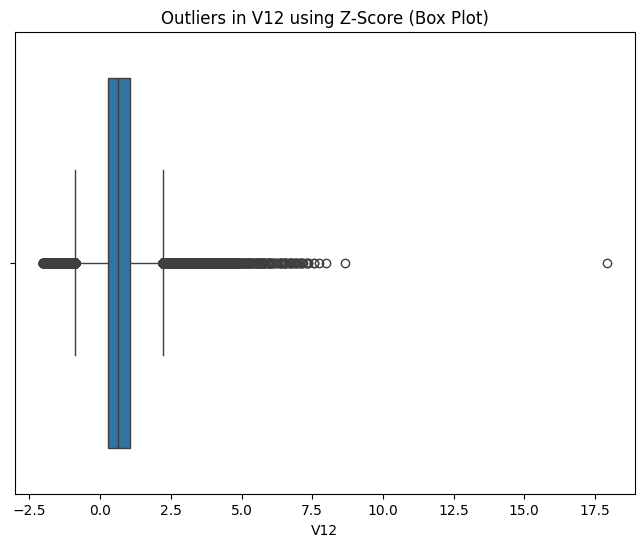

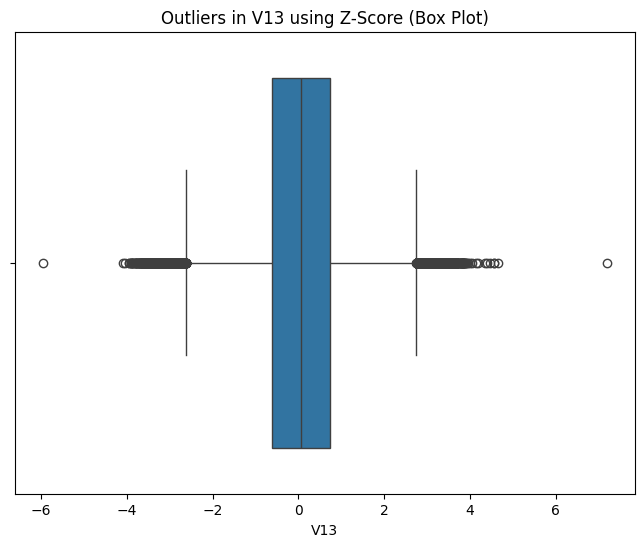

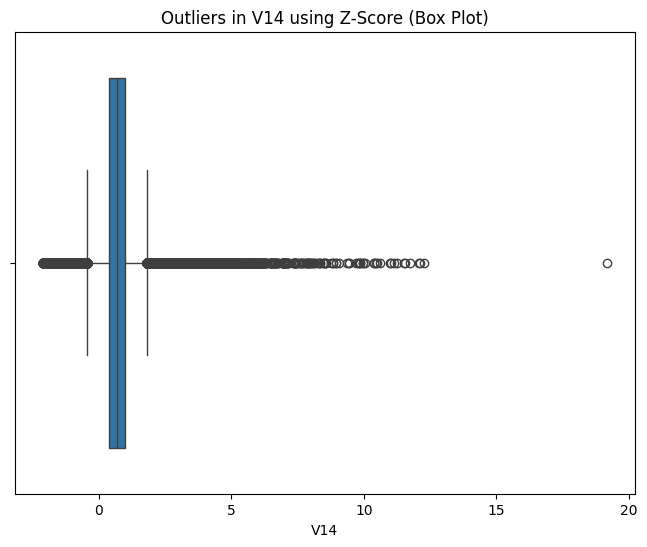

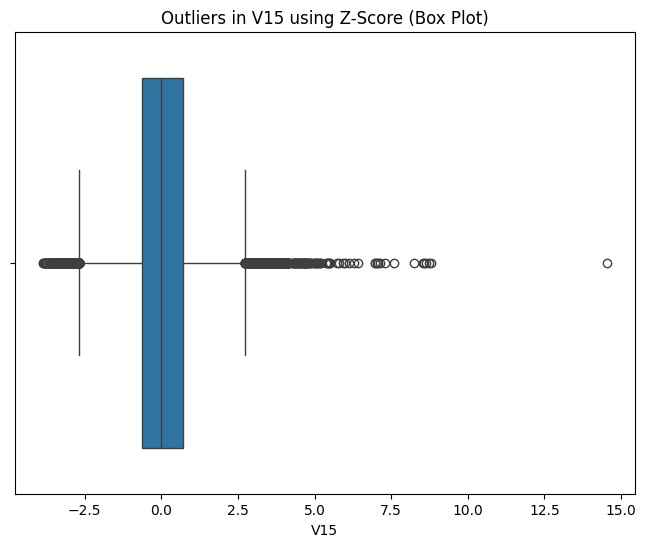

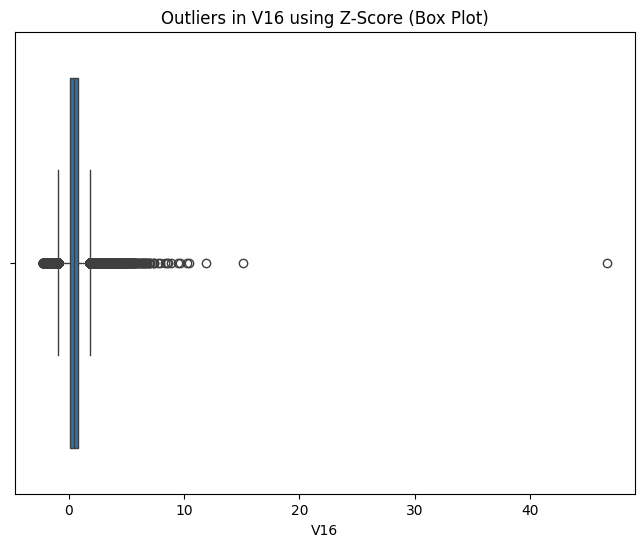

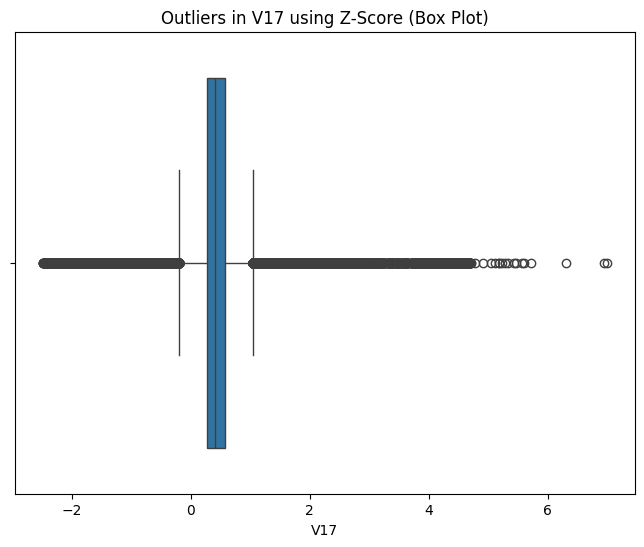

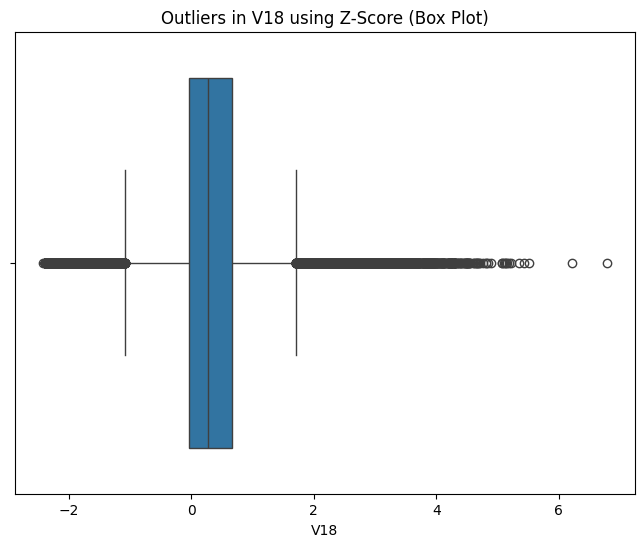

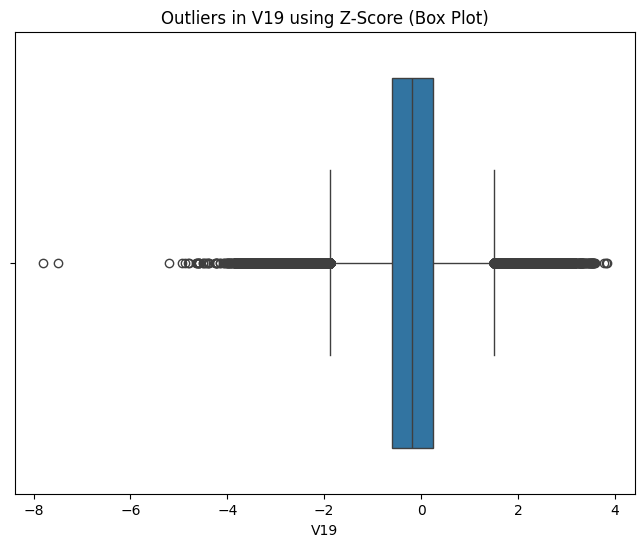

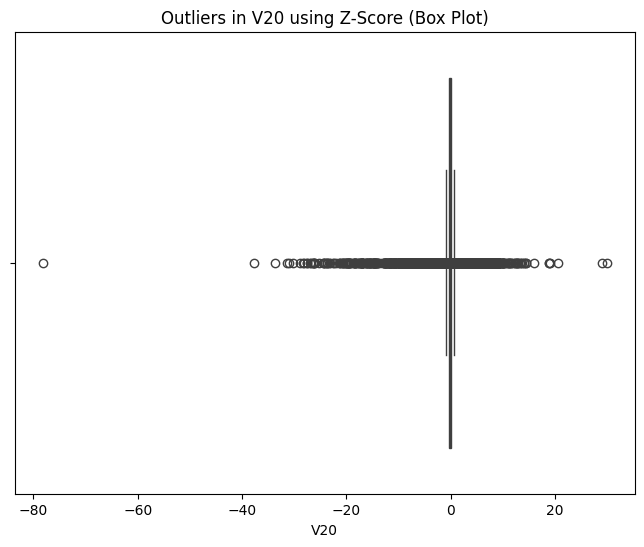

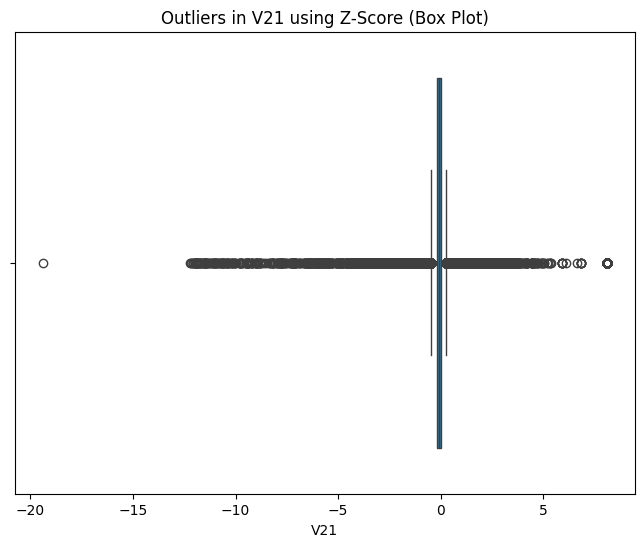

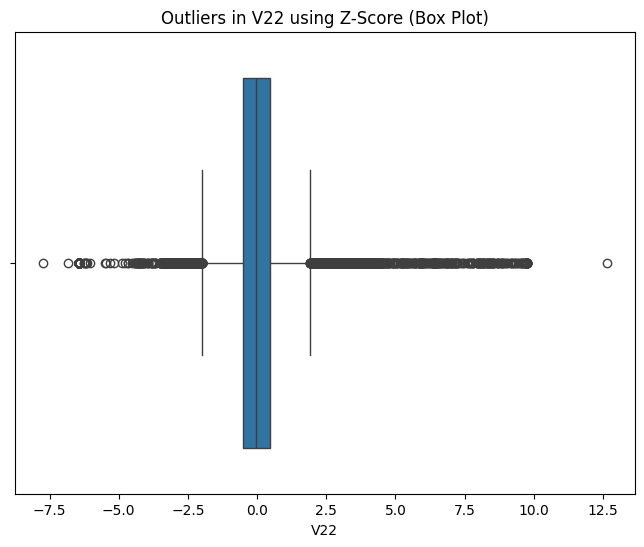

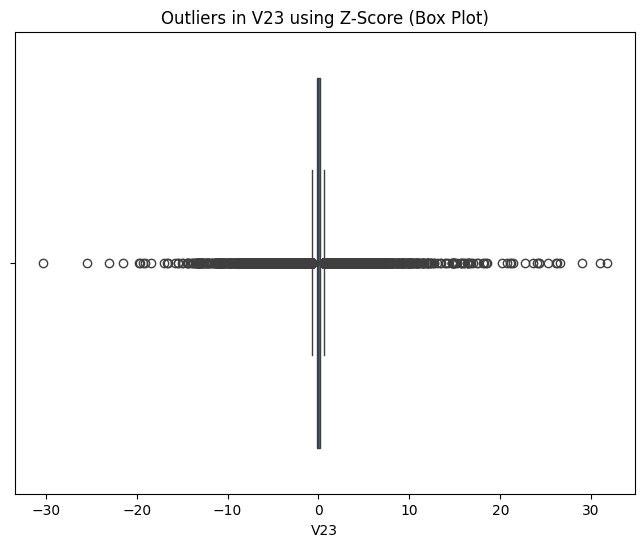

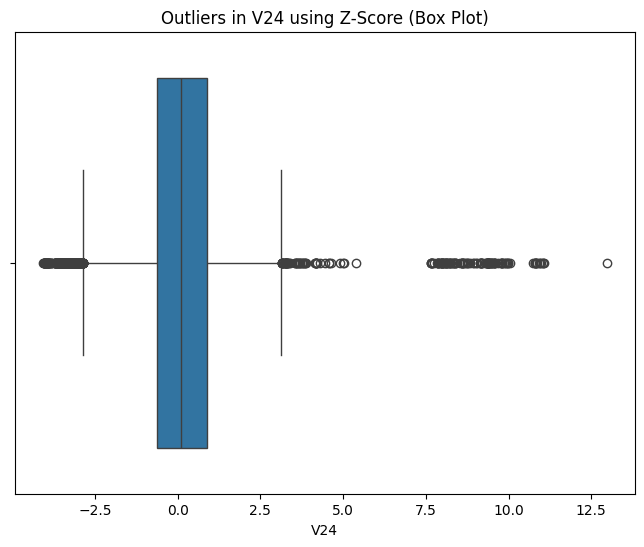

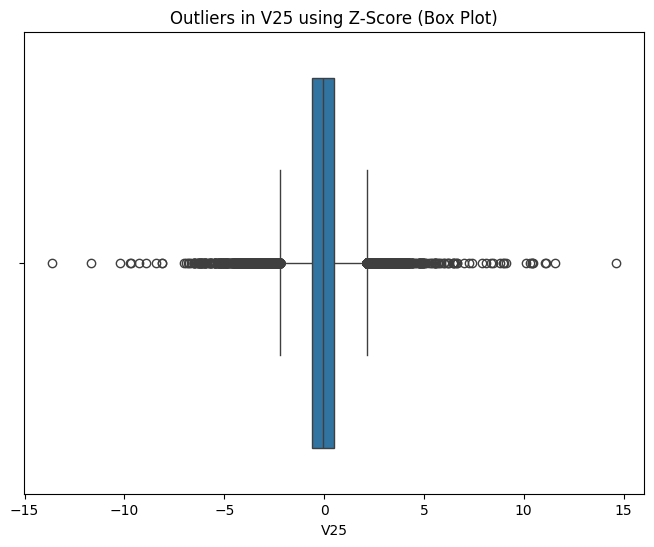

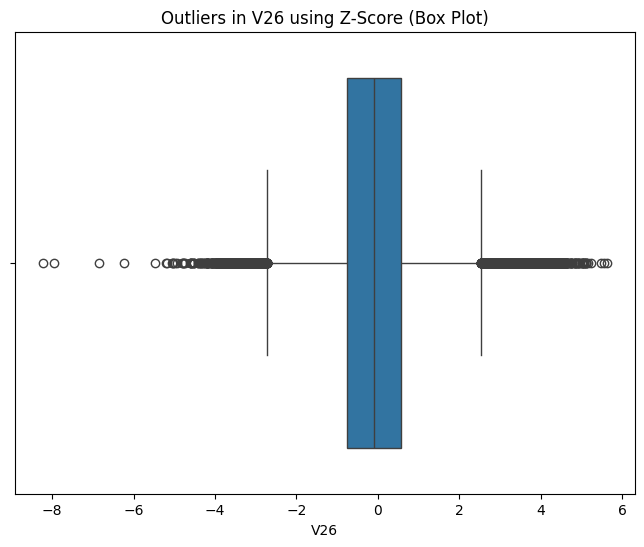

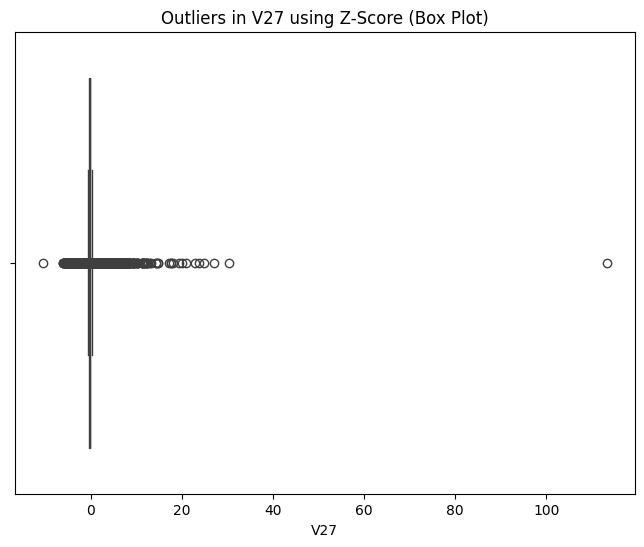

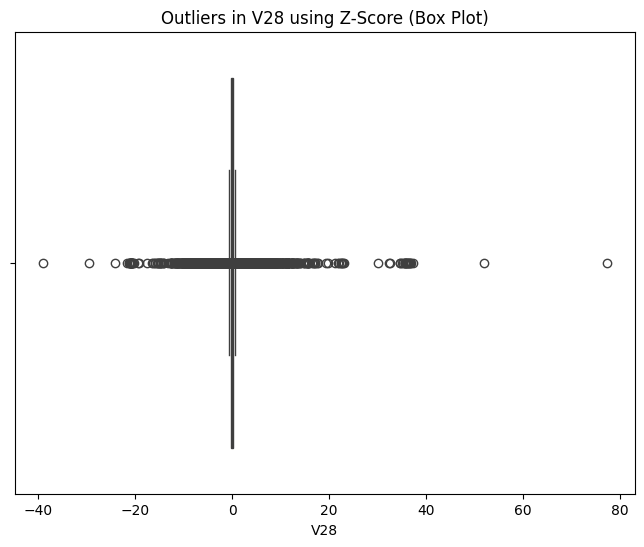

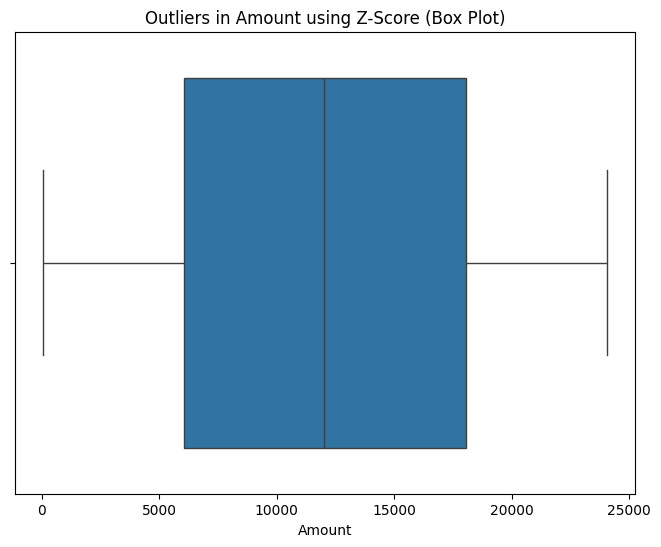

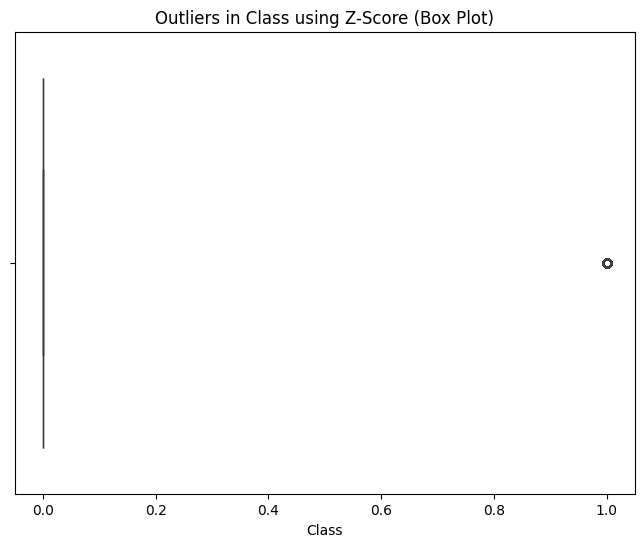

<ipython-input-38-389227ec3d42>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_iqr = resampled_df[(((resampled_df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]


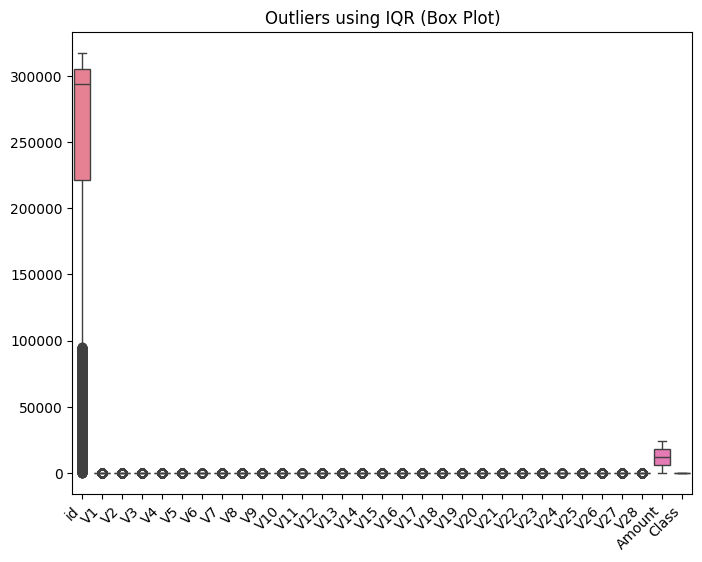

In [ ]:
import numpy as np
for feature in Numerical_Features:
    mean = np.mean(resampled_df[feature])
    std = np.std(resampled_df[feature])
    z_scores = (resampled_df[feature] - mean) / std
    outliers_z = resampled_df[feature][np.abs(z_scores) > 3]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature} using Z-Score (Box Plot)')
    plt.show()

# IQR method
Q1 = resampled_df[Numerical_Features].quantile(0.25)
Q3 = resampled_df[Numerical_Features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = resampled_df[(((resampled_df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers_iqr[Numerical_Features])
plt.title('Outliers using IQR (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X = resampled_df.drop(columns=['Class'])
y = resampled_df['Class']

X_manual = X.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

X_combined = np.hstack((X_scaled, X[['Amount']].values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


# **Information Gain**

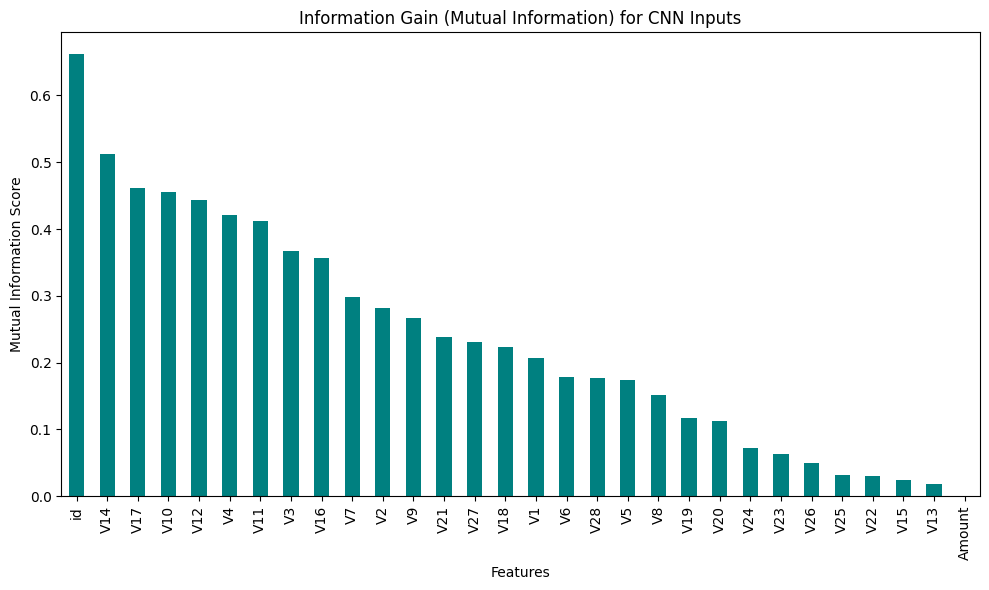

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

X_manual = X_resampled.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

# Add 'Amount' back after scaling the rest
X_combined = np.hstack((X_scaled, X_resampled[['Amount']].values))
feature_names = X_manual.columns.tolist() + ['Amount']

y = y_resampled

mi_scores = mutual_info_classif(X_combined, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)

# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information) for CNN Inputs")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.tight_layout()
plt.show()


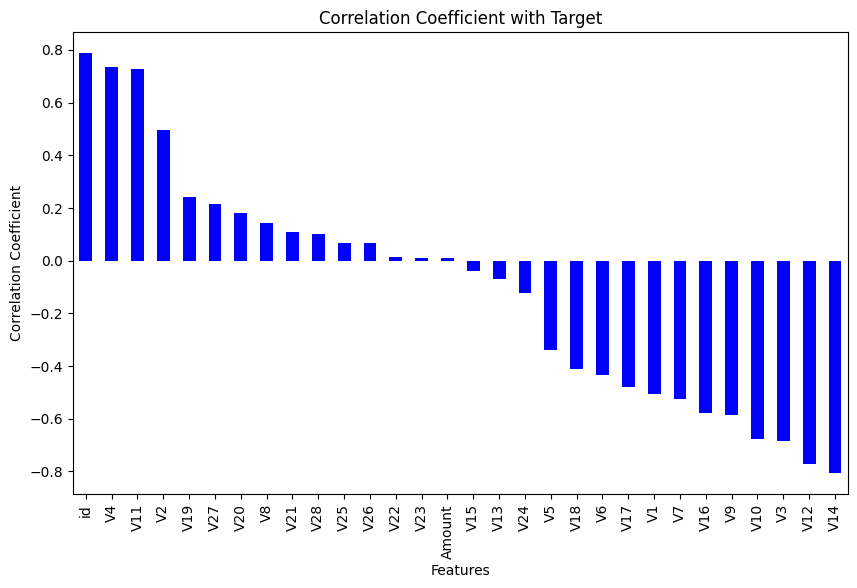

In [ ]:
# Correlation Coefficient
corr_scores = np.corrcoef(X.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index=feature_names)
corr_scores.sort_values(ascending=False, inplace=True)

# Plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# **CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


X_manual = X_resampled.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

X_combined = np.hstack((X_scaled, X_resampled[['Amount']].values))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_resampled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1325/1325 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5741 - loss: 21.4513 - val_accuracy: 0.9083 - val_loss: 0.3921
Epoch 2/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7648 - loss: 0.4564 - val_accuracy: 0.9087 - val_loss: 0.2195
Epoch 3/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8544 - loss: 0.3025 - val_accuracy: 0.9561 - val_loss: 0.1107
Epoch 4/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8891 - loss: 0.2341 - val_accuracy: 0.9548 - val_loss: 0.1014
Epoch 5/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9116 - loss: 0.1986 - val_accuracy: 0.9618 - val_loss: 0.0970
Epoch 6/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9279 - loss: 0.1703 - val_accuracy: 0.9709 - val_loss: 0.0724
Epoch 7/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9314 - loss: 0.1558 - val_accuracy: 0.9637 - val_loss: 0.0757
Epoch 8/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9453 - loss: 0.1294 - val_acc

# **Global Surrogate Model**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1325/1325 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6052 - loss: 13.5301 - val_accuracy: 0.8870 - val_loss: 0.3729
Epoch 2/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8254 - loss: 0.3950 - val_accuracy: 0.9305 - val_loss: 0.2143
Epoch 3/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8845 - loss: 0.2848 - val_accuracy: 0.9542 - val_loss: 0.1740
Epoch 4/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9162 - loss: 0.2098 - val_accuracy: 0.9624 - val_loss: 0.0926
Epoch 5/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9298 - loss: 0.1758 - val_accuracy: 0.9712 - val_loss: 0.0837
Epoch 6/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9422 - loss: 0.1526 - val_accuracy: 0.9723 - val_loss: 0.0658
Epoch 7/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9568 - loss: 0.1162 - val_accuracy: 0.9846 - val_loss: 0.0566
Epoch 8/10
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9645 - loss: 0.0993 - val_accur

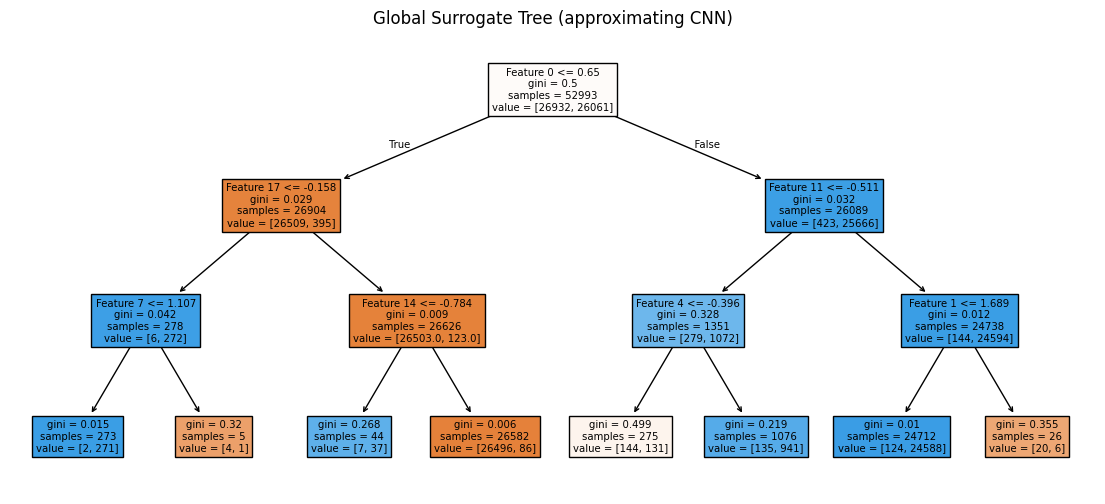

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Prepare and reshape the data
X_manual = X_resampled.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

X_combined = np.hstack((X_scaled, X_resampled[['Amount']].values))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_resampled, test_size=0.2, random_state=42)

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and train CNN
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 🧠 Step 2: Global Surrogate Model
# Predict on TRAINING data using the black-box CNN
cnn_preds_train = (model.predict(X_train_cnn) > 0.5).astype(int).flatten()

# Fit a decision tree as surrogate
surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate.fit(X_train, cnn_preds_train)

# Visualize the tree
plt.figure(figsize=(14, 6))
tree.plot_tree(surrogate, feature_names=[f"Feature {i}" for i in range(X_train.shape[1])], filled=True)
plt.title("Global Surrogate Tree (approximating CNN)")
plt.show()


# **Permutation Feature Importance**

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━

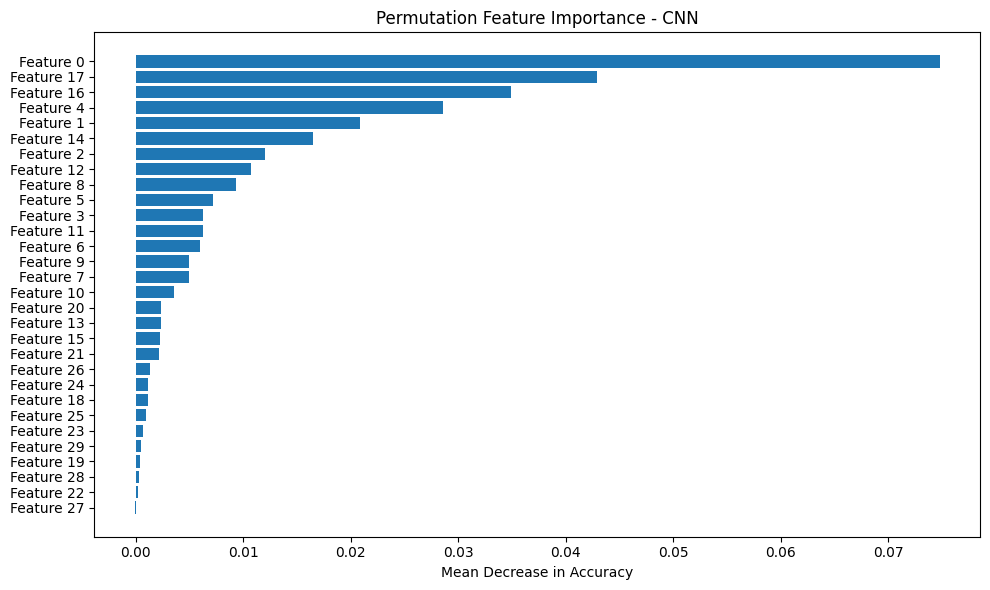

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
class KerasCNNWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        pass

    def predict(self, X):
        X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
        return (self.model.predict(X_reshaped) > 0.5).astype(int).flatten()

# Reshape test data to 2D for permutation importance
X_test_flat = X_test.reshape((X_test.shape[0], X_test.shape[1]))
wrapped_model = KerasCNNWrapper(model)

result = permutation_importance(
    estimator=wrapped_model,
    X=X_test_flat,
    y=y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh([f"Feature {i}" for i in sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Permutation Feature Importance - CNN")
plt.tight_layout()
plt.show()


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3d43c513818588c58de6ce69d56f843019d06eff42465840eef47bb012689331
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Flatten the test and train data for LIME
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Make sure you have the same feature names used before scaling
feature_names = X_resampled.drop(columns=['Amount']).columns.tolist() + ['Amount']
class_names = ['Not Fraud', 'Fraud']

# Define a predict_proba function for the CNN model
def cnn_predict_proba(x):
    x_reshaped = x.reshape((x.shape[0], x.shape[1], 1))
    preds = model.predict(x_reshaped)
    return np.hstack([(1 - preds), preds])  # Shape: (n_samples, 2)

# Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_flat,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True
)

# Explain instance i
i = 10
exp = explainer.explain_instance(
    X_test_flat[i],
    cnn_predict_proba,
    num_features=10
)

# Show explanation
exp.show_in_notebook(show_all=False)
print(exp.as_list())


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


[('11505.08 < Amount <= 17720.63', -0.08143875790384486), ('V6 <= -0.68', 0.02968443843123008), ('V7 <= -0.44', 0.026635327746020197), ('V16 <= -0.89', 0.020314539080043645), ('V3 <= -0.67', 0.01888883474777885), ('V17 <= -0.83', 0.015476914850638974), ('V12 <= -0.85', 0.01498751644319462), ('V18 <= -0.99', 0.014149426042856529), ('V15 <= -0.66', 0.013068288986280655), ('V26 > 0.82', 0.011352892242529609)]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

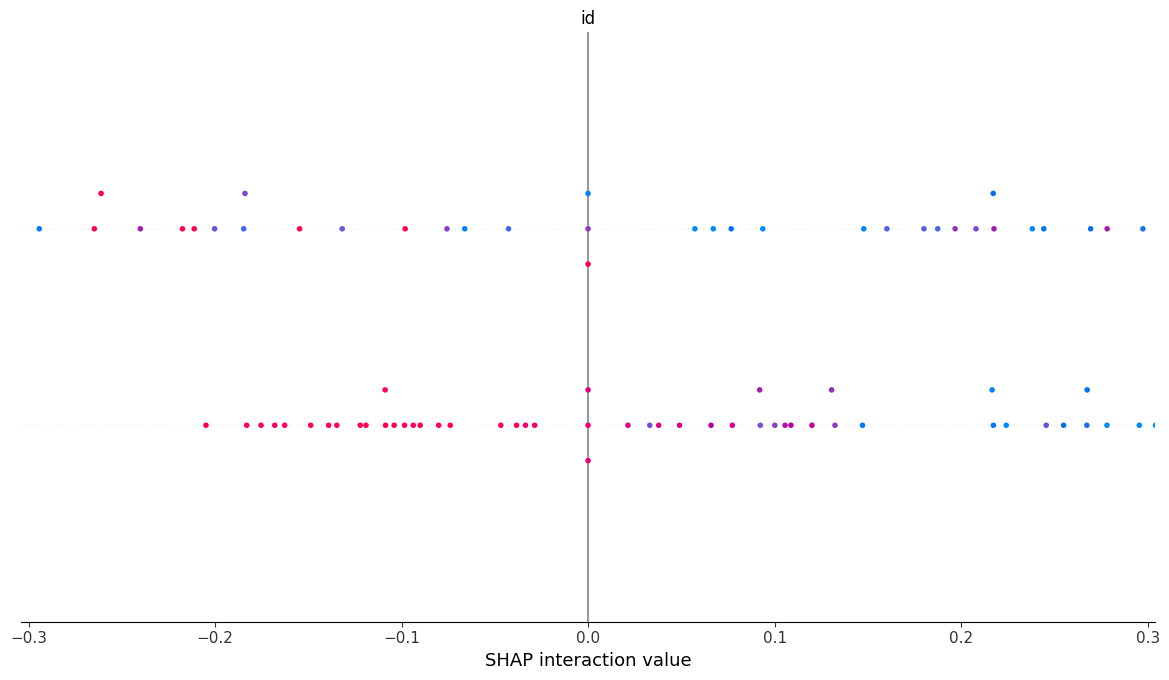

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])

def cnn_predict_proba(x):
    x_reshaped = x.reshape((x.shape[0], x.shape[1], 1))
    preds = model.predict(x_reshaped)
    return np.hstack([(1 - preds), preds])

explainer = shap.KernelExplainer(cnn_predict_proba, shap.sample(X_train_flat, 100, random_state=42))

sample_idx = np.random.choice(len(X_test_flat), 50, replace=False)
X_sample = X_test_flat[sample_idx]

shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]
else:
    shap_values_class1 = shap_values

# Visualize
shap.summary_plot(shap_values_class1, X_sample, feature_names=X_resampled.drop(columns=['Amount']).columns.tolist() + ['Amount'])
